**Decision Trees and Random Forests**

**Decision Tree:** A decision tree is a supervised learning algorithm, used for both classification and regression tasks, that utilizes a flowchart-like structure to make predictions.

**Random Forests:** Random forest is a supervised machine learning algorithm that is used for both classification and regression tasks. It combinies the outputs of multiple decision trees, and achieves higher accuracy and robustness compared to individual trees.

**Objective**: Learn tree-based models for classification & regression.

**Tools**: Scikit-learn, Graphviz

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
dataset = pd.read_csv('/content/heart.csv')

In [51]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Data Preprocessing**

In [52]:
dataset.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


**Converting categorical data into numerical data (Feature scaling)**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
cat_cols = dataset.select_dtypes(include=['object','category']).columns
cat_cols

Index([], dtype='object')

In [55]:
x = dataset.drop('target', axis=1)

In [56]:
y = dataset['target']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.2, random_state=42)

**Train a Decision Tree Classifier and visualize the tree.**

In [58]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

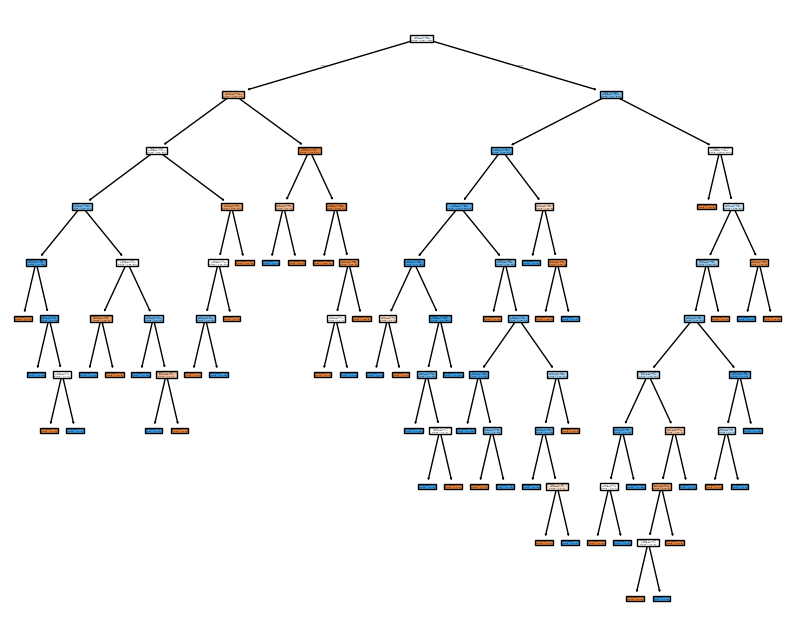

In [59]:
plt.figure(figsize=(10, 8))
plot_tree(tree, filled=True, feature_names=x_train.columns)
plt.show()

**Analyze Overfitting and Control Tree Depth**

Overfitting occurs when training accuracy is much higher than testing accuracy

**Accuracy using Decision Tree**

In [60]:
acc = accuracy_score(y_test, tree.predict(x_test))
acc

0.9853658536585366

**Train a Random Forest and Compare Accuracy**
Random Forest used to improve performance and reduce variance.

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

**Accuracy using Random Forest**

Random Forest typically performs better and generalizes more effectively than a single tree.

In [62]:
acc = accuracy_score(y_test, rf.predict(x_test))
acc

0.9853658536585366

**Interpret Feature Importances**

In [63]:
importances = rf.feature_importances_
feature_names = x_train.columns

In [64]:
imp_DataFrame = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_DataFrame.sort_values(by='Importance', ascending=False, inplace=True)

In [65]:
imp_DataFrame

,Feature,Importance
2,cp,0.135625
12,thal,0.128918
11,ca,0.127250
9,oldpeak,0.118615
7,thalach,0.112813
0,age,0.083679
4,chol,0.080154
3,trestbps,0.068272
10,slope,0.046335
8,exang,0.044241


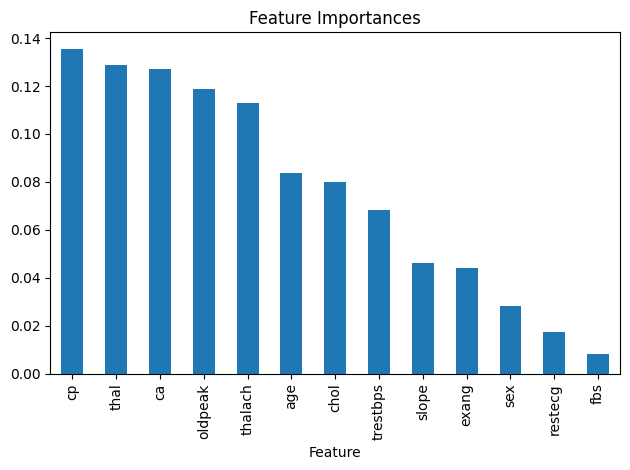

In [66]:
imp_DataFrame.plot(kind='bar', x='Feature', y='Importance', legend=False, title='Feature Importances')
plt.tight_layout()
plt.show()


**Evaluate Using Cross-Validation**  for evaluating model robustness

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
DecisionTree_score = cross_val_score(tree,x,y,cv=5)
RandomForest_score = cross_val_score(rf,x,y,cv=5)

**Decision Tree Score**

In [69]:
DecisionTree_score

array([1.        , 0.98536585, 1.        , 1.        , 1.        ])

**Random Forest Score**

In [70]:
RandomForest_score

array([1.        , 1.        , 1.        , 1.        , 0.98536585])